## Line plot - xGoals for and against over time in Python

As shown in the image below -taken from Coursera's 2022 report on the fastest growing digital skills in the marketplace- **data visualization** and being able to communicate key insights and takeaways effectively through aesthetically pleasing plots is on a steady rise :

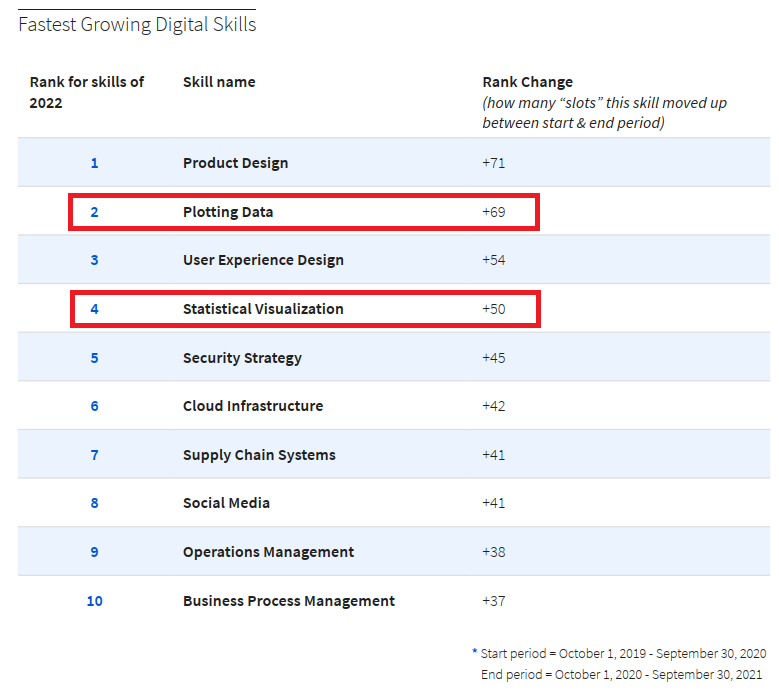

**Line plots** do a very good job explaining **trends over time** and today we are plotting a team's **xGoals difference chart** for the last three seasons.The team is **Volos NFC** , a newly-founded team that has been on an upwards path recently , having made it to the Greek Superleague championship playoffs this season 22-23.

Personally ,i find the design of TheAthletic's xGoals plots both appealing to the eye and capable of sending the desired message across (here is a recent one by Mark Carey made with R) so i am looking for a similar output , albeit using Python :

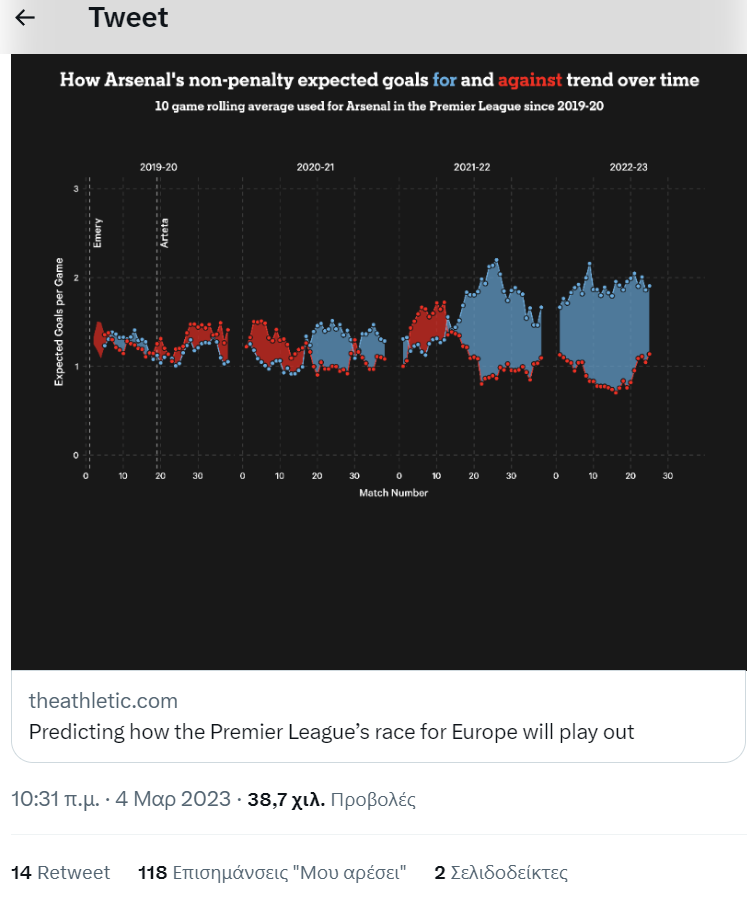

I obtained the data via Wyscout , xgoals for and against per match for the last three seasons.I am not plotting the raw values rather using a **rolling average**.As ChatGPT suggested , rolling averages _"do a good job at smoothing out the fluctuations , removing a lot of  the noise from temporary results and outliars and capture the long-term trends"_ :

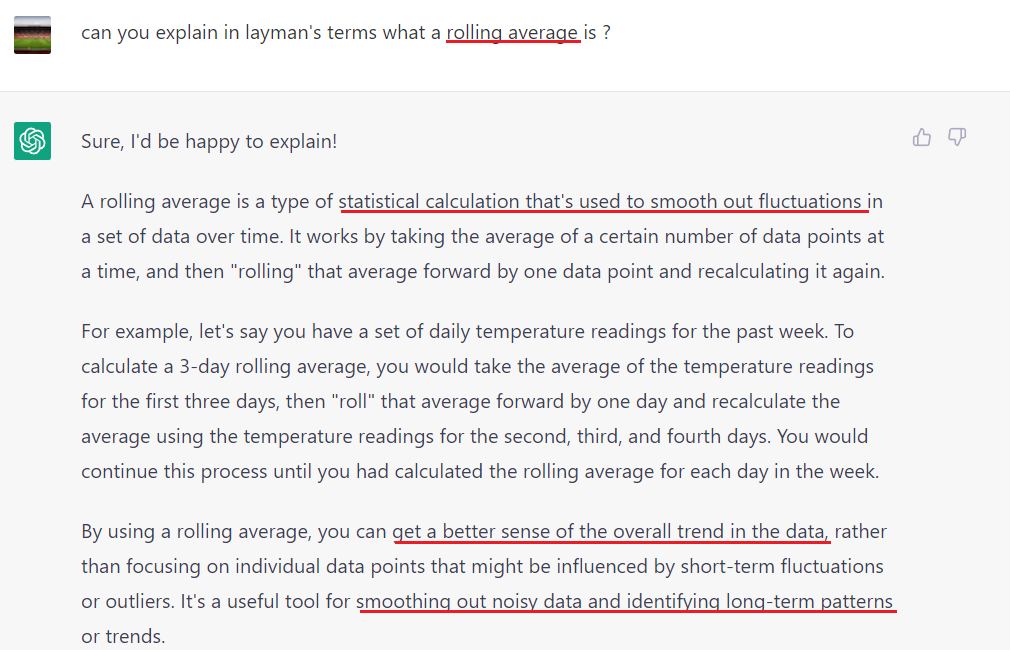

So first job is to import the libraries i am going to use , namely **pandas** for data wrangling and **matplotlib** for the visualization.I will also be using a bit of highlight_text for my title and subtitle.

In [1]:
# importing libraries

import pandas as pd #data wrangling
import matplotlib as mpl # data viz
import matplotlib.pyplot as plt
import numpy as np
from highlight_text import HighlightText

In [2]:
# importing the three .xlsx files into dataframes (make sure path strings are correct when running locally !)

to_eikosi=pd.read_excel("proti.xlsx") #season 20-21
to_ena=pd.read_excel("deyteri.xlsx") #season 21-22
to_dio=pd.read_excel("triti.xlsx") #season 22-23

Now let's merge all of them together in one dataframe with pd.merge _(outer join / all the rows)_ :

In [3]:
edone=pd.merge (to_eikosi,to_ena,how="outer")

In [4]:
edtwo=pd.merge(edone,to_dio,how="outer")

In [5]:
#dropping na vals and some columns we're not going to use
edtwo=edtwo.dropna()
edtwo=edtwo.drop(["Match","Competition","Duration","Scheme"],axis=1)

In [6]:
edtwo=edtwo.sort_values(by="Date",ascending=True)

In [8]:
# use indexing and make two df's for for and against values
ed_for=edtwo.loc[edtwo["Team"]=="Volos NFC"]
ed_against=edtwo.loc[edtwo["Team"]!="Volos NFC"]

In [14]:
ed_against=ed_against.rename({"xG":"xg_against","Team":"opponent"},axis=1)

In [16]:
#putting all of it together in the final dataframe df
df=pd.merge(ed_for,ed_against,how="inner",on="Date")

I tried plotting it with the Date col in the x axis but the ticks get too wordy and too bogged down , instead i create a new column **"week"** using the range function :

In [18]:
df["week"]=range(0,93)

In [20]:
df=df.rename({"xG":"xg_for"},axis=1)

Time to add two new columns containing the rolling averages (using the .rolling() function).As for the window argument i chose 6 , so pandas will **"roll" the averages every 6 weeks / a month and a half**.I find that to be a good window ,removing a lot of the match-to-match noise while keeping the long-term trends:

In [22]:
df["roll_avg_for"]=df["xg_for"].rolling(window=6).mean()
df["roll_avg_against"]=df["xg_against"].rolling(window=6).mean()

In [109]:
# the final dataframe (notice the NaN values for the first 6 weeks , since we chose a 6-week rolling avg in the previous step)
df.head(7)

,Date,Team,xg_for,opponent,xg_against,week,roll_avg_for,roll_avg_against
0,2020-09-13,Volos NFC,2.04,Atromitos,0.93,0,NaN,NaN
1,2020-09-20,Volos NFC,0.32,Aris,1.36,1,NaN,NaN
2,2020-09-26,Volos NFC,0.36,PAOK,1.23,2,NaN,NaN
3,2020-10-05,Volos NFC,1.02,Lamia,2.17,3,NaN,NaN
4,2020-10-17,Volos NFC,1.80,PAS Giannina,0.81,4,NaN,NaN
5,2020-10-24,Volos NFC,0.85,Panathinaikos,1.78,5,1.065000,1.380
6,2020-10-31,Volos NFC,1.12,Larissa,1.20,6,0.911667,1.425


In [24]:
# passing weeks as x axis , xgoals for as y1 and xgoals against as y2
x_val=df["week"]
y1_val=df["roll_avg_for"]
y2_val=df["roll_avg_against"]

Data wrangling is over , time to plot the thing. A few key points :
- setting the facecolor and axcolor to resemble the one Carey makes (hex code is **"#222222"**) ,
- using the **.fill_between()** to "fill" area under the curve with the appropriate color each time ,
- using axvlines to define the change in season.


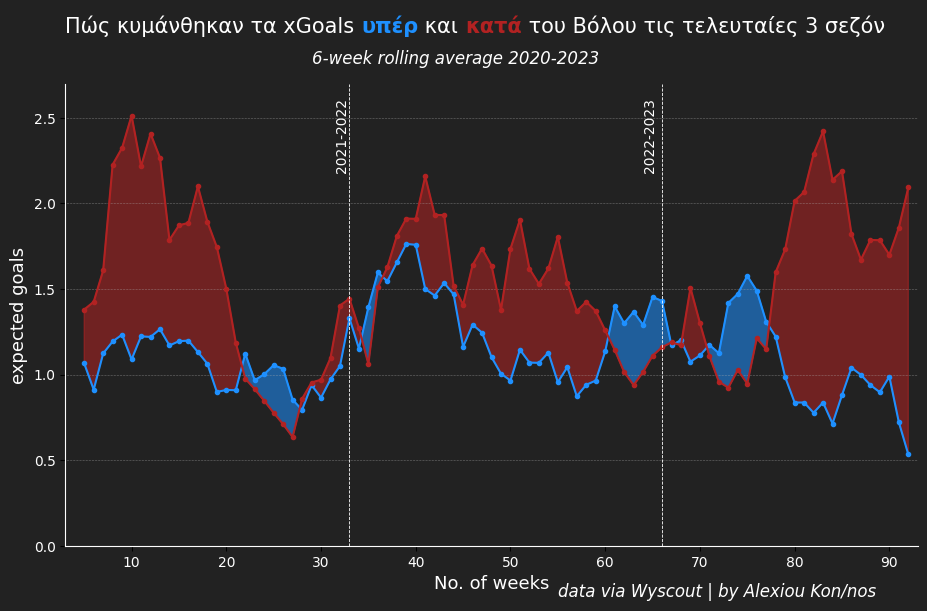

In [103]:
fig=plt.figure(figsize=(11,6))
fig.set_facecolor("#222222") # setting the background color
ax=plt.subplot(111)
ax.set_facecolor("#222222")

#plot xgoals for and xg against
ax.plot(x_val,y1_val,color="dodgerblue",marker="o",markersize=3,linestyle="solid")
ax.plot(x_val,y2_val,color="firebrick",marker="o",markersize=3,linestyle="solid")

# fill the areas under the curve with the appropriate color
the_over=ax.fill_between(x_val,y1_val,y2_val,where=(y1_val>y2_val),interpolate=True,color="dodgerblue",alpha=0.55)
the_under=ax.fill_between(x_val,y1_val,y2_val,where=(y1_val<y2_val),interpolate=True,color="firebrick",alpha=0.55)

ax.tick_params(axis="both",labelcolor="white")

ax.set_ylim([0,2.7])
ax.set_xlim([3,93])


plt.xticks(ticks=[10,20,30,40,50,60,70,80,90])

ax.spines["top"].set(visible=False)
ax.spines["right"].set(visible=False)
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")

ax.grid(True,axis="y",ls=":",lw=0.4)

ax.set_ylabel("expected goals",color="white",fontsize=13)
ax.set_xlabel("No. of weeks",color="white",fontsize=13)

#using axvline to denote the change in season
plt.axvline(x=33,ymin=0,ymax=1,color="white",linestyle="dashed",linewidth=0.6)
plt.axvline(x=66,ymin=0,ymax=1,color="white",linestyle="dashed",linewidth=0.6)
ax.text(31.5,2.2,"2021-2022",color="white",fontsize=10,rotation=90)
ax.text(64,2.2,"2022-2023",color="white",fontsize=10,rotation=90)


# using the highlight_text package to do the title
the_title=HighlightText(x=3,y=3.1,s="Πώς κυμάνθηκαν τα xGoals <υπέρ> και <κατά> του Βόλου τις τελευταίες 3 σεζόν",fontsize=15,
                       color="white",highlight_textprops=[{"color":"dodgerblue","fontweight":"bold"},
                                                         {"color":"firebrick","fontweight":"bold"}],
                       ax=ax)

the_subtitle=HighlightText(x=29,y=2.9,s="<6-week rolling average 2020-2023>",fontsize=12,
                       color="white",highlight_textprops=[{"fontweight":"light","fontstyle":"italic"}],
                       ax=ax)



the_log=ax.text(55,-0.3,"data via Wyscout | by Alexiou Kon/nos",
               color="white",fontsize=12,fontstyle="italic")
# plt.savefig("volos.png",dpi=120)

So there you have it ! It is clear that for the latter part of the current season Volos has been conceding a lot more xgoals than he is creating (all the red area) nevertheless the team made it to the playoffs.What does that tell us ?
Expected goals and expected goals difference are great metrics but there is always something more , especially in a sport like football.More context is always needed.

Thanks for reading !